<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/Caltech-JPL-Intern/HRDiagramGen/NASAExoplanetArchive/HRDiagramGen_NASAExoplanetArchive_LessDataFields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab Notebook to plot Hertzsprung–Russell diagram based on stellar hosts data from NASA Exoplanet Archive:
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=STELLARHOSTS

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the stellar hosts data from the csv file. Each stellar host is represented as a row entry in the csv file,
# with four data fields:
#     hostname (Host Name),
#     sy_dist (Distance in parsecs),
#     sy_bmag (B Magnitude),
#     sy_vmag (V Magnitude)
#
# To run the program, download the stellar hosts data csv file into the Google dirve and change the following filename path accordingly.
stellar_hosts_filename = '/content/drive/My Drive/Colab Notebooks/STELLARHOSTS.csv'
stellar_hosts_data = pd.read_table(stellar_hosts_filename,
                                   skiprows=11,
                                   sep=',',
                                   header=None,
                                   index_col=None,
                                   names = ['hostname', 'sy_dist', 'sy_bmag', 'sy_vmag'],
                                   skipfooter=0,
                                   engine='python')

In [4]:
# Sanity check the first several rows of data to ensure data is read correctly
stellar_hosts_data.head()

,hostname,sy_dist,sy_bmag,sy_vmag
0,11 Com B,100.1580,NaN,12.61700
1,11 Com,93.1846,5.726,4.72307
2,11 Com,93.1846,5.726,4.72307
3,11 Com,93.1846,5.726,4.72307
4,11 Com,93.1846,5.726,4.72307


In [5]:
# Sanity check the last several rows of data to ensure data is read correctly.
stellar_hosts_data.tail()

,hostname,sy_dist,sy_bmag,sy_vmag
44431,xi Aql,56.1858,5.761,4.70964
44432,xi Aql,56.1858,5.761,4.70964
44433,xi Aql,56.1858,5.761,4.70964
44434,xi Aql,56.1858,5.761,4.70964
44435,xi Aql,56.1858,5.761,4.70964


In [6]:
# Get the statistics about the data
stellar_hosts_data.describe()

,sy_dist,sy_bmag,sy_vmag
count,43226.000000,42670.000000,43550.000000
mean,683.527503,13.951977,13.123077
std,751.243492,3.016907,2.985927
min,1.301190,0.011000,-0.010000
25%,213.260000,12.737000,12.052000
50%,565.752000,14.853000,14.081500
75%,935.191000,16.045000,15.238000
max,8800.000000,21.239000,45.340000


In [7]:
# Change any fields with empty spaces with NaN values so we could clean them up later on
stellar_hosts_data = stellar_hosts_data.applymap(
    lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
stellar_hosts_data.describe()

,sy_dist,sy_bmag,sy_vmag
count,43226.000000,42670.000000,43550.000000
mean,683.527503,13.951977,13.123077
std,751.243492,3.016907,2.985927
min,1.301190,0.011000,-0.010000
25%,213.260000,12.737000,12.052000
50%,565.752000,14.853000,14.081500
75%,935.191000,16.045000,15.238000
max,8800.000000,21.239000,45.340000


In [8]:
# Clean up data - drop off rows that contain NaN values
stellar_hosts_data = stellar_hosts_data.dropna()
stellar_hosts_data.describe()

,sy_dist,sy_bmag,sy_vmag
count,41766.000000,41766.000000,41766.000000
mean,629.205521,13.904642,13.075958
std,499.243797,3.020015,2.927216
min,1.301190,0.011000,0.872000
25%,216.354000,12.710000,11.980000
50%,561.229000,14.823000,14.036000
75%,923.067000,16.015000,15.203000
max,3460.510000,20.384000,19.775000


In [9]:
# Clean up data - drop off duplicate rows from the data
stellar_hosts_data = stellar_hosts_data.drop_duplicates(subset=['hostname'])
stellar_hosts_data.describe()

,sy_dist,sy_bmag,sy_vmag
count,3894.000000,3894.000000,3894.000000
mean,525.548791,13.415486,12.574572
std,488.704607,3.098582,3.008030
min,1.301190,0.011000,0.872000
25%,115.014000,11.605500,10.773250
50%,391.947500,14.187500,13.380500
75%,813.025000,15.784750,14.963500
max,3460.510000,20.384000,19.775000


In [10]:
stellar_hosts_data['sy_dist'] = stellar_hosts_data['sy_dist'].astype(float)
stellar_hosts_data['sy_bmag'] = stellar_hosts_data['sy_bmag'].astype(float)
stellar_hosts_data['sy_vmag'] = stellar_hosts_data['sy_vmag'].astype(float)

In [11]:
# Calculate B-V color index for each stellar host
stellar_hosts_data['b-v_index'] = stellar_hosts_data['sy_bmag'] - stellar_hosts_data['sy_vmag']

# Sanity check several stellar hosts at the beginning rows to make sure B-V color indexes are calculated correctly
stellar_hosts_data.head()

,hostname,sy_dist,sy_bmag,sy_vmag,b-v_index
1,11 Com,93.1846,5.726,4.72307,1.00293
9,11 UMi,125.3210,6.382,5.01300,1.36900
16,14 And,75.4392,6.256,5.23133,1.02467
25,14 Her,17.9323,7.495,6.61935,0.87565
48,HIP 96895,21.1389,6.604,5.96100,0.64300


In [12]:
# Calculate absolute magnitudes based on the formula in http://astronomy.swin.edu.au/cosmos/A/Absolute+Magnitude
stellar_hosts_data['absmag'] = stellar_hosts_data['sy_vmag'] - 5 * np.log10(stellar_hosts_data['sy_dist']/10.)

# Sanity check several stellar hosts at the beginning rows to make sure absolute magnitudes are calculated correctly
stellar_hosts_data.head()

,hostname,sy_dist,sy_bmag,sy_vmag,b-v_index,absmag
1,11 Com,93.1846,5.726,4.72307,1.00293,-0.123651
9,11 UMi,125.3210,6.382,5.01300,1.36900,-0.477119
16,14 And,75.4392,6.256,5.23133,1.02467,0.843345
25,14 Her,17.9323,7.495,6.61935,0.87565,5.351170
48,HIP 96895,21.1389,6.604,5.96100,0.64300,4.335588


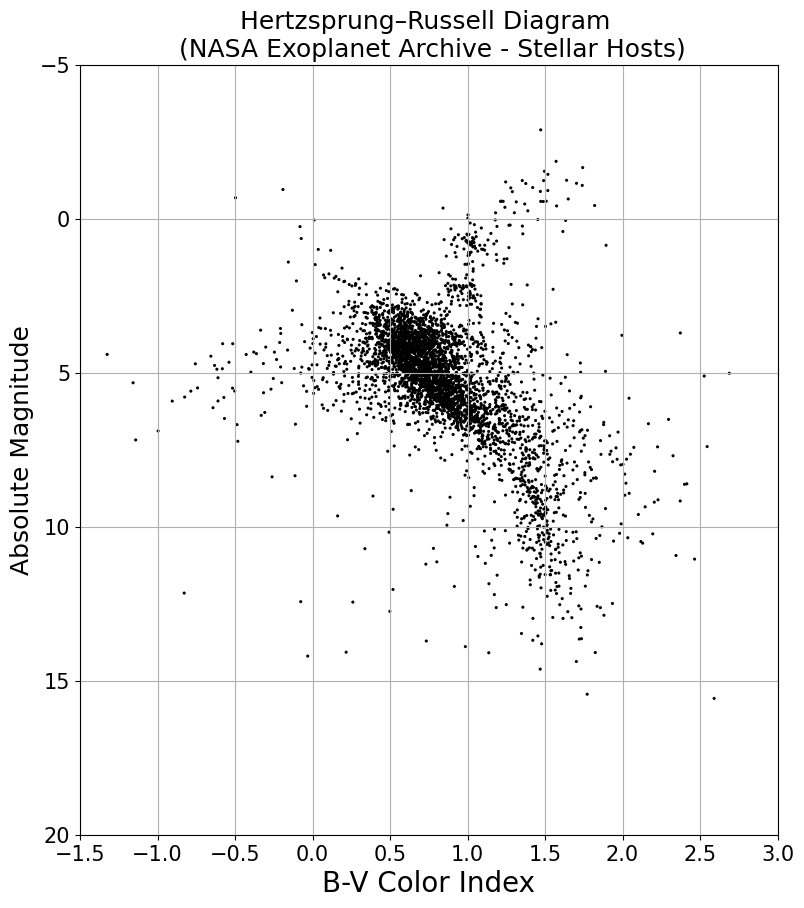

In [13]:
# Plot H-R diagram

fig, ax = plt.subplots(figsize=(9,10))

ax.set_xlim(-1.5, 3.0)
ax.set_ylim(20, -5)
ax.grid()
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(18)

ax.set_xlabel('B-V Color Index')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Absolute Magnitude')
ax.yaxis.label.set_fontsize(18)

ax.scatter(stellar_hosts_data['b-v_index'],
           stellar_hosts_data['absmag'],
           s=5,
           edgecolors='none',
           c='k')

ax.tick_params(axis='both', labelsize=15)